<a href="https://colab.research.google.com/github/mlvlab/DFC609-2022S/blob/master/HW_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris 데이터셋 분류하기
## Clustering을 이용하여 자유롭게 분류해보고 분석해봅시다.

## 1. 데이터셋 로드

['setosa' 'versicolor' 'virginica']


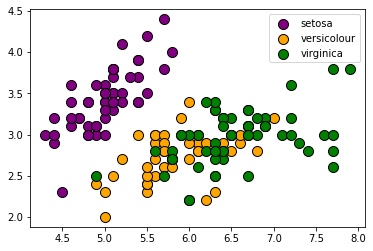

In [9]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris_data = load_iris()   #loading iris dataset from sklearn.datasets
x = iris_data.data #last column values excluded
y = iris_data.target #last column value, 0: Setosa, 1: Versicolor, 2: Virginica
target_names = iris_data.target_names
print(target_names)

#Visualising the clusters
plt.scatter(x[y == 0, 0], x[y == 0, 1], s = 100, c = 'purple', label = 'setosa', edgecolor='black')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s = 100, c = 'orange', label = 'versicolour', edgecolor='black')
plt.scatter(x[y == 2, 0], x[y == 2, 1], s = 100, c = 'green', label = 'virginica', edgecolor='black')
plt.legend()
plt.show()

## 2. K-means clustering 적용해보기

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
pred_kmeans = kmeans.fit_predict(x)

print(kmeans.cluster_centers_) #display cluster centers

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


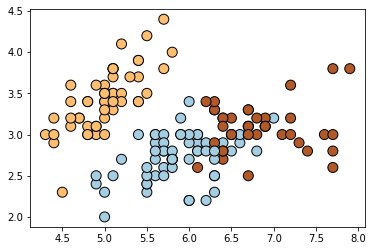

In [11]:
#Visualising the clusters
plt.scatter(x[:, 0], x[:,1], s=100, c=pred_kmeans, cmap=plt.cm.Paired, edgecolors='k')
plt.show()

## 3. Agglomerative 적용해보기
* linkage를 조절해봅시다.

In [12]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete') # linkage: 'complete' or 'single'
pred_agg = agg.fit_predict(x)

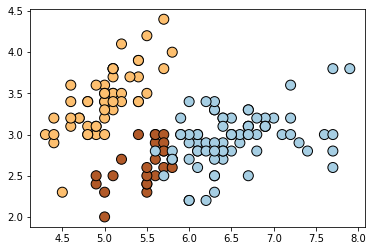

In [13]:
#Visualising the clusters
plt.scatter(x[:, 0], x[:,1], s=100, c=pred_agg, cmap=plt.cm.Paired, edgecolors='k')
plt.show()

## 4. DBSCAN 적용해보기

* eps와 min_samples를 조절해봅시다.

In [14]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=7, metric='euclidean') 
pred_db = db.fit_predict(x)

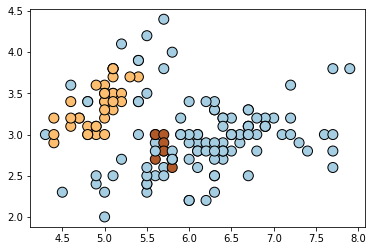

In [15]:
#Visualising the clusters
plt.scatter(x[:,0], x[:,1], s=100, c=pred_db, cmap=plt.cm.Paired, edgecolors='k')
plt.show()